# Imports

In [1]:
# Python standard library
import csv

# Scientific computing
import numpy as np
import scipy.interpolate
import matplotlib.pyplot as plt

# Load data

In [2]:
file_path = './plain_signal.csv'

data = np.genfromtxt(file_path,delimiter = ',', skip_header = 2)

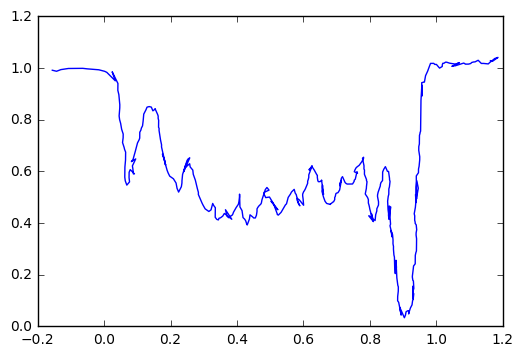

In [3]:
plt.plot(data[:,0], data[:,1])
plt.show()

# Interpolate data

In [4]:
print np.array([[data_interpolated(1.*i/N_points)] for i in range(N_points)]).shape

NameError: name 'N_points' is not defined

In [5]:
print(data[:,0].shape)

(538,)


In [6]:
data_interpolated = scipy.interpolate.interp1d(data[:,0], data[:,1])

N_points = 1000
data_resampled = np.hstack((np.array([[1.*i/N_points] for i in range(N_points)]), np.array([[data_interpolated(1.*i/N_points)] for i in range(N_points)])))

In [7]:
data_resampled = np.hstack((np.ones(len(data_resampled[:,1]))+.005*np.random.rand(len(data_resampled[:,1])), data_resampled[:,1]))
data_resampled = np.hstack((data_resampled, np.ones(len(data_resampled))+.005*np.random.rand(len(data_resampled))))

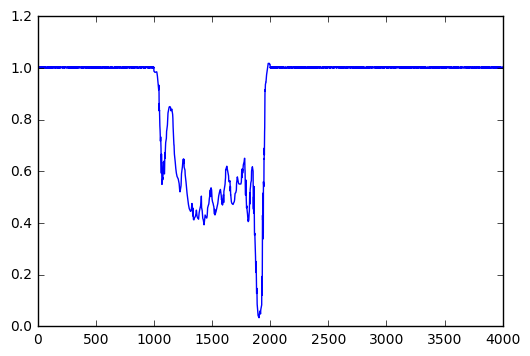

In [8]:
plt.plot(data_resampled)
plt.show()

# Perform moving average

In [9]:
cumsum_vec = np.cumsum(np.insert(data_resampled, 0, 0))
window_widths = [25,50,75,100,125,150,175,200,250,300,500]
ma_vecs = [(cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width for window_width in window_widths]

# Add noise

In [10]:
cmap = plt.get_cmap('viridis')

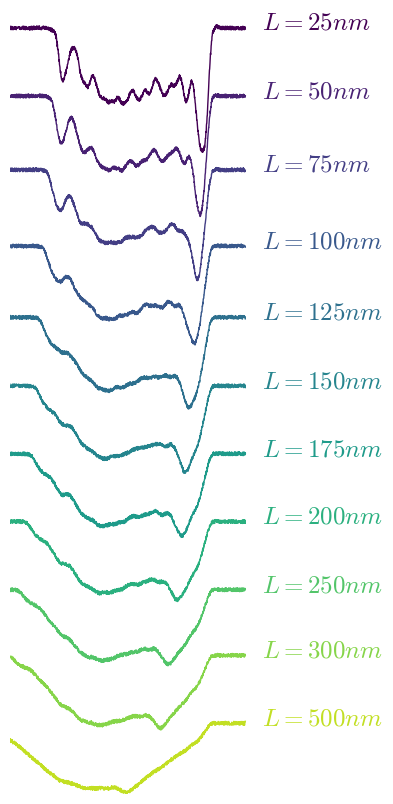

In [11]:


fig = plt.figure(figsize = (4,8))
    
offset = .5
for i in range(len(window_widths)):
    noisy_simulated = np.copy(ma_vecs[i])
    for j in range(noisy_simulated.shape[0]):
        noisy_simulated[j] += .03*np.random.rand()
        
    noisy_simulated = noisy_simulated - np.min(noisy_simulated)
    plt.plot(noisy_simulated[750:2150]-i*offset, color = cmap(1.*i/len(window_widths)))
    plt.text(1500, np.max(noisy_simulated)-.03 - i*offset, r'$L=' + str(window_widths[i]) + ' nm$', size = 18, color = cmap(1.*i/len(window_widths)), ha = 'left')

for key in plt.gca().spines.keys():
    plt.gca().spines[key].set_visible(False)
plt.xticks([])
plt.yticks([])

plt.xlim(0,2200)

fig.tight_layout()


plt.savefig('many_plain_signals_smoothed.png', dpi = 100)

plt.show()

# Mystery signal

In [120]:
cumsum_vec = np.cumsum(np.insert(data_resampled, 0, 0))
window_widths = [75]
ma_vecs = [(cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width for window_width in window_widths]

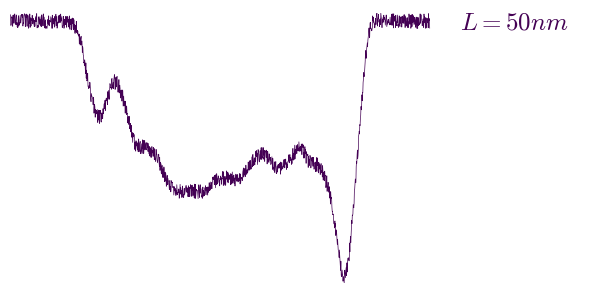

In [124]:


fig = plt.figure(figsize = (6,3))
    
offset = .5
for i in range(len(window_widths)):
    noisy_simulated = np.copy(ma_vecs[i])
    for j in range(noisy_simulated.shape[0]):
        noisy_simulated[j] += .05*np.random.rand()
        
    noisy_simulated = noisy_simulated - np.min(noisy_simulated)
    color = np.array([32,65,128])/255.
    plt.plot(noisy_simulated[750:2150]-i*offset, color = cmap(0), lw = .5)
    #plt.text(1500, np.max(noisy_simulated)-.03 - i*offset, r'$L=???nm$', size = 18, color = color)

for key in plt.gca().spines.keys():
    plt.gca().spines[key].set_visible(False)
plt.xticks([])
plt.yticks([])

plt.text(2150-650, np.max(noisy_simulated[750:2150])-.05-i*offset,r'$L=50nm$', size = 18, color =  cmap(0), ha = 'left')


plt.xlim(0,1900)

fig.tight_layout()


plt.savefig('transformed_signal.png', dpi = 100)

plt.show()

# Moving average diagram

In [96]:
cumsum_vec = np.cumsum(np.insert(data_resampled, 0, 0))
window_widths = [25,75]
ma_vecs = [(cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width for window_width in window_widths]

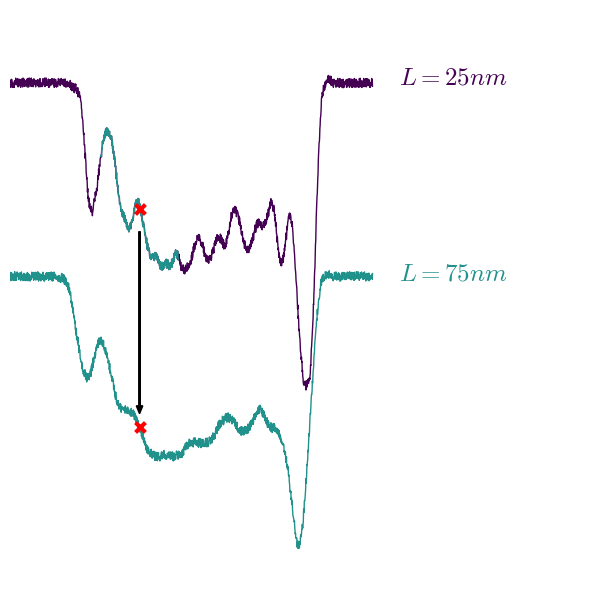

In [104]:
fig = plt.figure(figsize = (6,6))
    
offset = .5

x = 500

for i in range(len(window_widths)):
    noisy_simulated = np.copy(ma_vecs[i])
    for j in range(noisy_simulated.shape[0]):
        noisy_simulated[j] += .03*np.random.rand()
        
    noisy_simulated = noisy_simulated - np.min(noisy_simulated)
    plt.plot(noisy_simulated[750:2150]-i*offset, color = cmap(1.*i/len(window_widths)))
    plt.text(1500, np.max(noisy_simulated)-.03 - i*offset, r'$L=' + str(window_widths[i]) + ' nm$', size = 18, color = cmap(1.*i/len(window_widths)), ha = 'left')

    if i == 0:
        plt.plot(range(x-150,x+150), noisy_simulated[750:2150][x-150:x+150]-i*offset, color = cmap(0.5))
        
    plt.scatter(x, noisy_simulated[750:2150][x]-i*offset, c = 'red', marker = 'x', lw = 3, s = 50, zorder = 10)
    

# Arrow
plt.gca().arrow(x,0.5,0,-.55, width = 6, head_width = 25, head_length = .025, color = 'k')

    
# Cosmetics
for key in plt.gca().spines.keys():
    plt.gca().spines[key].set_visible(False)
plt.xticks([])
plt.yticks([])

plt.xlim(0,2200)

fig.tight_layout()


plt.savefig('moving_average_process.png', dpi = 100)

plt.show()

# Dynamic time warping

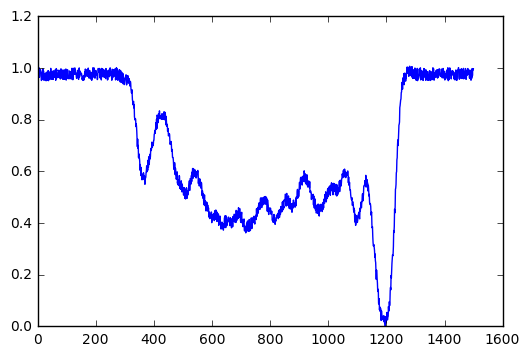

In [77]:
signal_1 = np.copy(noisy_simulated[700:2200])
plt.plot(signal_1)
plt.show()

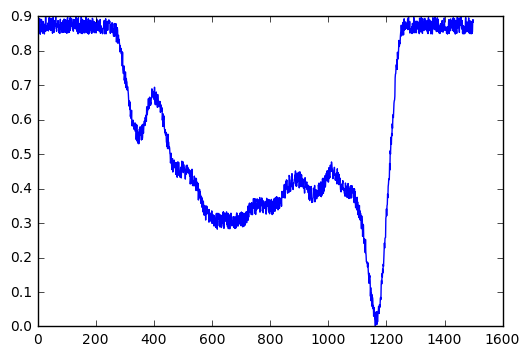

In [80]:
signal_2 = np.copy(noisy_simulated[700:2200])
plt.plot(signal_2)
plt.show()

In [81]:
def get_distance_DTW(a_i, b_i):
    distance_ = ((a_i - b_i)**2.0)**0.5
    return distance_




def get_distance_matrix_DTW(a, b):
    distance_matrix_ = np.zeros((len(a), len(b)))
    for i in range(0, distance_matrix_.shape[0]):
        for j in range(0, distance_matrix_.shape[1]):
            distance_matrix_[i,j] = get_distance_DTW(a[i], b[j])

    return distance_matrix_

def get_distance_DDTW(a, i, b, j):
    #a,b are 1-D numpy arrays
    #i, j are indices of elements we want distance between

    if i == a.shape[0]-1:
        d_a = (a[i]-a[i-1]+(a[0]-a[i-1]/2.0)/2.0)
    else:
        d_a = (a[i] - a[i-1] + (a[i+1] - a[i-1])/2.0)/2.0

    if j == b.shape[0]-1:
        d_b = (b[j] - b[j-1]+(b[0] - b[j-1]/2.0)/2.0)
    else:
        d_b = (b[j] - b[j-1] + (b[j+1] - b[j-1])/2.0)/2.0

    distance_ = ((d_a - d_b)**2.0)**0.5
    return distance_



def get_distance_matrix_DDTW(a, b):
    distance_matrix_ = np.zeros((a.shape[0], b.shape[0]))
    for i in range(0, distance_matrix_.shape[0]):
        for j in range(0, distance_matrix_.shape[1]):
            distance_matrix_[i,j] = get_distance_DDTW(a, i, b, j)

    return distance_matrix_



def get_cost_matrix(distance_matrix_, h_wt_ = 1, v_wt_ = 1, d_wt_ = 1):
    infinity = 2.0**32.0
    cost_matrix_ = infinity*np.zeros((distance_matrix_.shape[0], distance_matrix_.shape[1]))

    for i in range(0, cost_matrix_.shape[0]):
        for j in range(0, cost_matrix_.shape[1]):
            if i == 0 and j == 0:
                cost_matrix_[i,j] = distance_matrix_[i,j]
            else:
                if i == 0:
                    cost_matrix_[i,j] = distance_matrix_[i,j] + v_wt_*cost_matrix_[i,j-1]
                elif j == 0:
                    cost_matrix_[i,j] = distance_matrix_[i,j] + h_wt_*cost_matrix_[i-1,j]

                else: cost_matrix_[i,j] = min(h_wt_*distance_matrix_[i,j] + cost_matrix_[i-1,j],\
                    v_wt_*distance_matrix_[i,j] + cost_matrix_[i,j-1],\
                    d_wt_*distance_matrix_[i,j] + cost_matrix_[i-1,j-1])

    return cost_matrix_



def get_warp_path(cost_matrix_):
    
    warp_path = np.array(([[cost_matrix.shape[0]-1, cost_matrix.shape[1]-1]]))
    
    i = warp_path[0,0]
    j = warp_path[0,1]

    while(i > 0 or j > 0):
        if i == 0:
            j = j - 1
        elif j == 0:
            i = i - 1

        else:
            if min(cost_matrix_[i-1, j], cost_matrix_[i-1, j-1], cost_matrix_[i,j-1]) == cost_matrix_[i-1, j]:
                i = i - 1
            elif min(cost_matrix_[i-1, j], cost_matrix_[i-1, j-1], cost_matrix_[i, j-1]) == cost_matrix_[i-1, j-1]:
                i = i - 1
                j = j - 1
            elif min(cost_matrix_[i-1, j], cost_matrix_[i-1, j-1], cost_matrix_[i,j-1]) == cost_matrix_[i, j-1]:
                j = j - 1

        warp_path = np.vstack((warp_path, np.array([[i,j]])))

    return warp_path

In [82]:
distance_matrix = get_distance_matrix_DDTW(signal_1, signal_2)

cost_matrix = get_cost_matrix(distance_matrix)

warp_path = get_warp_path(cost_matrix)

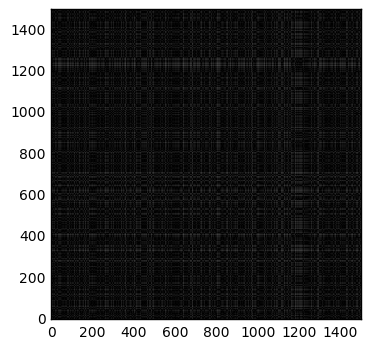

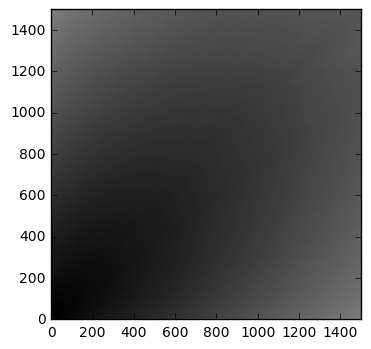

In [83]:
plt.imshow(distance_matrix, cmap = 'gray', origin = 'lower', interpolation = 'none')
plt.show()


plt.imshow(cost_matrix, cmap = 'gray', origin = 'lower', interpolation = 'none')
plt.show()

#### DTW Plot

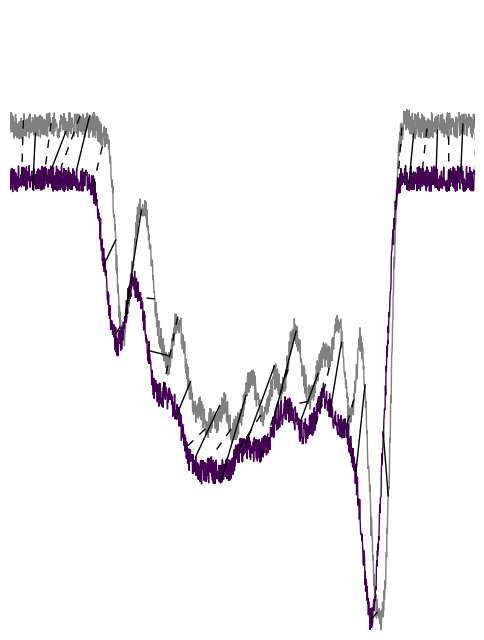

In [125]:
fig = plt.figure(figsize = ((6,8)))

plt.plot(signal_1, color = 'gray')

offset = 0
plt.plot(signal_2 + offset, color = cmap(0))

for i, ele in enumerate(warp_path):
    if i %50 == 0:
        if i % 100 == 0:
            ls = '--'
        else:
            ls = '-'
        plt.plot([ele[0], ele[1]], [signal_1[ele[0]], signal_2[ele[1]] + offset], c = 'k', ls = ls)
        
        
for key in plt.gca().spines.keys():
    plt.gca().spines[key].set_visible(False)
    
plt.xticks([])
plt.yticks([])
        
        
plt.xlim(0,1500)
    
#plt.savefig('dtw_matching.png', dpi = 100)
    
plt.show()